## 決定木を用いる分類器

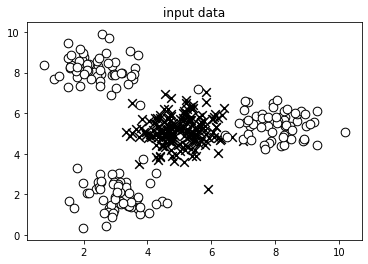

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn import model_selection
from sklearn.tree import DecisionTreeClassifier

%matplotlib inline
%run utilities.ipynb

# ファイルを読み込む
input_file = './data/data_decision_trees.txt'
data = np.loadtxt(input_file, delimiter=',')

# Xは最終列までの値、yは最終列
X, y = data[:, :-1], data[:, -1]

# yのラベル地に基づいてclass_0とclass_1で分ける
class_0 = np.array(X[y==0])
class_1 = np.array(X[y==1])

# グラフの箱を作る
plt.figure()

# ラベルが0のものはxで表示する。
# s：マーカーのサイズ、facecolor：マーカーの塗り潰し色、edgecolors：マーカーの境界色
plt.scatter(class_0[:, 0], class_0[:, 1], s=75, facecolor='black', edgecolors='black', linewidths=1, marker='x')

# ラベルが1のものはoで表示する。
plt.scatter(class_1[:, 0], class_1[:, 1], s=75, facecolor='white', edgecolors='black', linewidths=1, marker='o')

plt.title("input data")
plt.show()

- class_0は中央の方
- class_1は周辺  
  
に散布している

### データセットを訓練用とテスト用に分ける

x_vals: [[ 0.08  0.09  0.1  ... 11.15 11.16 11.17]
 [ 0.08  0.09  0.1  ... 11.15 11.16 11.17]
 [ 0.08  0.09  0.1  ... 11.15 11.16 11.17]
 ...
 [ 0.08  0.09  0.1  ... 11.15 11.16 11.17]
 [ 0.08  0.09  0.1  ... 11.15 11.16 11.17]
 [ 0.08  0.09  0.1  ... 11.15 11.16 11.17]]
y_vals: [[-0.11 -0.11 -0.11 ... -0.11 -0.11 -0.11]
 [-0.1  -0.1  -0.1  ... -0.1  -0.1  -0.1 ]
 [-0.09 -0.09 -0.09 ... -0.09 -0.09 -0.09]
 ...
 [10.85 10.85 10.85 ... 10.85 10.85 10.85]
 [10.86 10.86 10.86 ... 10.86 10.86 10.86]
 [10.87 10.87 10.87 ... 10.87 10.87 10.87]]
x_vals.ravels: [ 0.08  0.09  0.1  ... 11.15 11.16 11.17]
y_vals.ravels: [-0.11 -0.11 -0.11 ... 10.87 10.87 10.87]
[1. 1. 1. ... 1. 1. 1.]
[[1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 ...
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]]


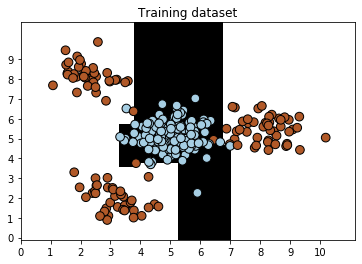

In [3]:
# 訓練用データを75%、テスト用データは25%
# random_stateは結果に再現性を求める時に指定すると良い。
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.25, random_state=1)

# max_depthは決定木の深さ
params = {'random_state': 0, 'max_depth': 4}
classifier = DecisionTreeClassifier(**params)

# 訓練
classifier.fit(X_train, y_train)

# 訓練データを可視化。黒い部分が訓練データによって決まった決定木の境界部分
visualize_classifier(classifier, X_train, y_train, 'Training dataset')

### テスト用データで分類結果を可視化する

x_vals: [[-0.25 -0.24 -0.23 ...  9.27  9.28  9.29]
 [-0.25 -0.24 -0.23 ...  9.27  9.28  9.29]
 [-0.25 -0.24 -0.23 ...  9.27  9.28  9.29]
 ...
 [-0.25 -0.24 -0.23 ...  9.27  9.28  9.29]
 [-0.25 -0.24 -0.23 ...  9.27  9.28  9.29]
 [-0.25 -0.24 -0.23 ...  9.27  9.28  9.29]]
y_vals: [[-0.65 -0.65 -0.65 ... -0.65 -0.65 -0.65]
 [-0.64 -0.64 -0.64 ... -0.64 -0.64 -0.64]
 [-0.63 -0.63 -0.63 ... -0.63 -0.63 -0.63]
 ...
 [10.65 10.65 10.65 ... 10.65 10.65 10.65]
 [10.66 10.66 10.66 ... 10.66 10.66 10.66]
 [10.67 10.67 10.67 ... 10.67 10.67 10.67]]
x_vals.ravels: [-0.25 -0.24 -0.23 ...  9.27  9.28  9.29]
y_vals.ravels: [-0.65 -0.65 -0.65 ... 10.67 10.67 10.67]
[1. 1. 1. ... 1. 1. 1.]
[[1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 ...
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]]


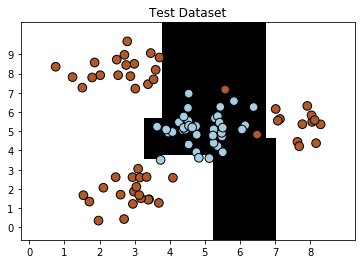

In [9]:
# 訓練された決定木にテスト用データを当てはめた場合、適切にう分類されるか見る
visualize_classifier(classifier, X_test, y_test, 'Test Dataset')

*2個ぐらいは上手く分類されていなかった*

In [ ]:
# テスト用データでラベルを予測する
y_test_pred = classifier.predict(X_test)

In [8]:
# テストレポート作成
class_names = ['Class_0', 'Class_1']
print("Classifier performance on training dataset\n")
print(classification_report(y_train, classifier.predict(X_train), target_names=class_names))

print("Classifier performance on test dataset\n")
print(classification_report(y_test, y_test_pred, target_names=class_names))

Classifier performance on training dataset

              precision    recall  f1-score   support

     Class_0       0.99      0.99      0.99       143
     Class_1       0.98      0.99      0.99       127

    accuracy                           0.99       270
   macro avg       0.99      0.99      0.99       270
weighted avg       0.99      0.99      0.99       270

Classifier performance on test dataset

              precision    recall  f1-score   support

     Class_0       0.94      0.92      0.93        37
     Class_1       0.94      0.96      0.95        53

    accuracy                           0.94        90
   macro avg       0.94      0.94      0.94        90
weighted avg       0.94      0.94      0.94        90

